# Interleaved Maplibre basemap rendering

This is a simple example to show how to render Lonboard layers interleaved in the Maplibre layer stack.

In this case, the text label "San Francisco" is rendered (by Maplibre) _on top of_ the underlying image.

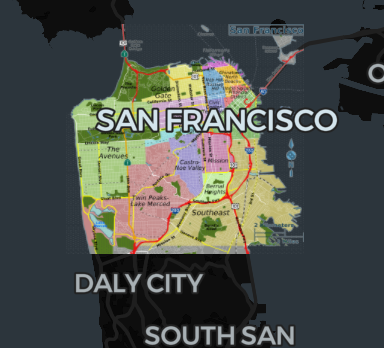

## Imports

In [ ]:
from lonboard import BitmapLayer, Map
from lonboard.basemap import CartoStyle, MaplibreBasemap

Create a new `BitmapLayer`.

To activate interleaved rendering, we also pass in the `before_id` property of the layer. The value of `before_id` should be an identifier of a layer in the _Maplibre basemap layer stack_. The deck.gl layer will be rendered just before the layer with the given identifier. 

You can find such an identifier by inspecting the basemap style JSON. For example, in the [raw JSON](https://basemaps.cartocdn.com/gl/positron-gl-style/style.json) of the Carto Positron style, each layer has an `"id"` property. The first layer in the basemap stack has `"id": "background"`. So, for example, if you pass `before_id="background"`, you won't see your deck.gl layer because it will be rendered below **all** layers in the Maplibre basemap.

A common choice for Carto-based styles is to use `before_id="watername_ocean"` so
that your deck.gl layer is rendered above the core basemap elements but below all
text labels.

In [ ]:
layer = BitmapLayer(
    image="https://raw.githubusercontent.com/visgl/deck.gl-data/master/website/sf-districts.png",
    bounds=[-122.5190, 37.7045, -122.355, 37.829],
    before_id="watername_ocean",
)

Now we create our `MaplibreBasemap` set to `"interleaved"`.

In [ ]:
basemap = MaplibreBasemap(mode="interleaved", style=CartoStyle.DarkMatter)

Now the map is rendered with deck.gl inside of Maplibre

In [ ]:
m = Map(layer, basemap=basemap)
m.set_view_state(zoom=9)
m